In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data= pd.read_csv(r"C:\Users\yash-\Downloads\polynomial_regression_train (1).csv")

In [4]:
d_np=data.to_numpy()

In [5]:
X=d_np[:,1:6]
y=d_np[:,6]
X_mean=np.mean(X)
X_std=np.std(X)
X_normalize=(X-X_mean)/X_std

In [6]:
X_train=X_normalize[:38400,:]
X_test=X_normalize[38401:,:]
y_train=y[0:38400]
y_test=y[38401:]

Total cost is 4.313498600702833e-17
Loss is 8.626997201405689e-17
R2score of model is 0.24086800647064133


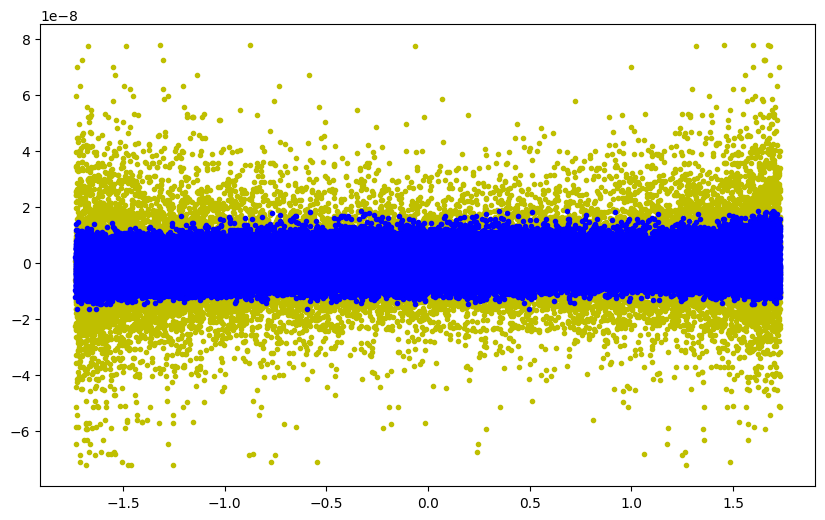

LEARNING CURVE


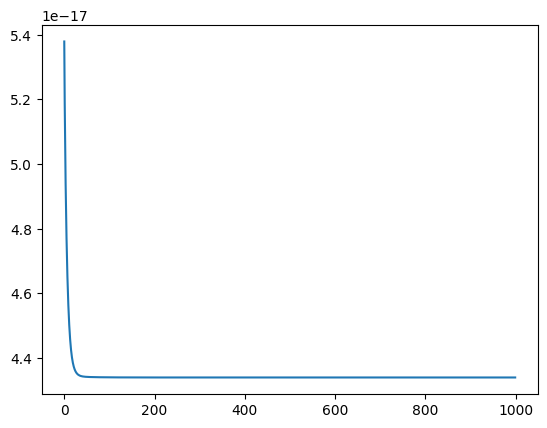

In [8]:
def loss_function(y,y_pred):
    loss=np.mean((y_pred-y)**2)
    return loss
def calculate_gradients(X,y,y_pred):
    n_samples= X.shape[0]
    dw = (1/n_samples)*np.dot(X.T,(y_pred-y))
    db = (1/n_samples)*np.sum(y_pred-y)
    return dw,db
def create_polynomial_feature_set(X,degrees):
    m,n=X.shape
    nP=(degrees)*n
    A=np.matrix(X)
    M=np.zeros((m,nP))
    ic=0
    for i in range(m):
        for j in range(n):
            d=1
            while d<=degrees:
             M[i,ic] =A[i,j]**d
             ic+=1
             d+=1
        ic=0
    return M
def cost_function(X,y,w,b,degrees):
    XP=create_polynomial_feature_set(X,degrees)
    m=XP.shape[0]
    cost=0.0
    for i in range(m):
     f_wb=np.dot(w,XP[i])+b
     cost+=(f_wb-y[i])**2
    total_cost=(1/(2*m))*cost
    return total_cost
def train(X,y,degrees,epochs,lr,lambd):
    XP=create_polynomial_feature_set(X,degrees)
    
    m,n=XP.shape
    w=np.zeros(n)
    b=0
    cost_list=[]
    for epoch in range(epochs):
            y_hat=np.matmul(XP,w)+b
            dw,db=calculate_gradients(XP,y,y_hat)
            
            w=w*(1-((lr*lambd)/m))-lr*dw
            b-=lr*db
            
            cost=cost_function(X,y,w,b,3)
            cost_list.append(cost)

    return w,b,cost_list
def predict(X,w,b,degrees):
    XP=create_polynomial_feature_set(X,degrees)
    return np.dot(XP,w) +b


def r2square(y,y_hat):
    sse=np.sum((np.array(y) - np.array(y_hat))**2)
    tse=np.sum((np.array(y)-np.mean(np.array(y_hat)))**2)
    return 1-sse/tse

epochs=1000  
w_trained,b_trained,Cost_list=train(X_train,y_train,degrees=3,epochs=epochs,lr=10**-1,lambd=0.1)
y_hat=predict(X_test,w_trained,b_trained,3)
cost=cost_function(X_test,y_test,w_trained,b_trained,3)
print('Total cost is',cost)
print('Loss is',loss_function(y_test,y_hat))
print('R2score of model is',r2square(y_test,y_hat))


fig=plt.figure(figsize=(10,6))
plt.plot(X_test,y_test,'y.')
plt.plot(X_test,y_hat,'b.')
plt.show()

print("LEARNING CURVE")
t=np.arange(0,epochs)
plt.plot(t,Cost_list)
plt.show()